# Gráficos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

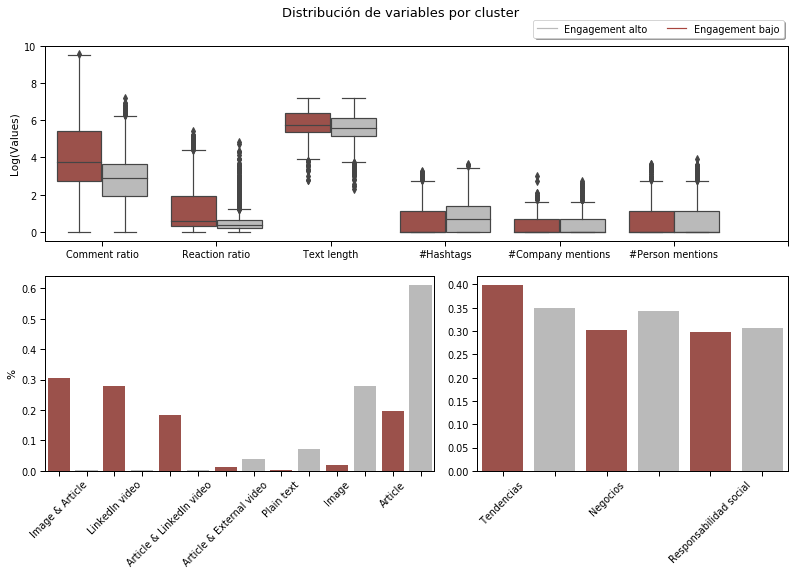

In [2]:
df = pd.read_csv('df_influ_clusters.csv')

df1 = pd.read_csv('df_influ_clusters (1).csv',dtype=object)
df1.loc[df1['Article_Type_C'] == '0000','Article_Type_C'] = 'Plain text'
df1.loc[df1['Article_Type_C'] == '0001','Article_Type_C'] = 'Article'
df1.loc[df1['Article_Type_C'] == '0011','Article_Type_C'] = 'Article & External video'
df1.loc[df1['Article_Type_C'] == '0100','Article_Type_C'] = 'LinkedIn video'
df1.loc[df1['Article_Type_C'] == '0101','Article_Type_C'] = 'Article & LinkedIn video'
df1.loc[df1['Article_Type_C'] == '1000','Article_Type_C'] = 'Image'
df1.loc[df1['Article_Type_C'] == '1001','Article_Type_C'] = 'Image & Article'
set(df1['Article_Type_C'])


lista1 = [(df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df['dominant_topic']=='tendencias')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 0) & (df['dominant_topic']=='tendencias')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 0)].value_counts()))[0],
          
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df['dominant_topic']=='negocios')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
                   
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 0) & (df['dominant_topic']=='negocios')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 0)].value_counts()))[0],
          
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df['dominant_topic']=='responsabilidad social')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
         
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 0) & (df['dominant_topic']=='responsabilidad social')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 0)].value_counts()))[0]]


lista2 = [(df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df1['Article_Type_C']=='Image & Article')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          0.0024,(df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df1['Article_Type_C']=='LinkedIn video')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          0.0024,(df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df1['Article_Type_C']=='Article & LinkedIn video')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          0.0024,(df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df1['Article_Type_C']=='Article & External video')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 0) & (df1['Article_Type_C']=='Article & External video')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 0)].value_counts()))[0],
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df1['Article_Type_C']=='Plain text')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 0) & (df1['Article_Type_C']=='Plain text')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 0)].value_counts()))[0],
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df1['Article_Type_C']=='Image')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 0) & (df1['Article_Type_C']=='Image')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 0)].value_counts()))[0],
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 1) & (df1['Article_Type_C']=='Article')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 1)].value_counts()))[1],
          (df['Engagement_Alto'][(df['Engagement_Alto'] == 0) & (df1['Article_Type_C']=='Article')].value_counts()/(df['Engagement_Alto'][(df['Engagement_Alto'] == 0)].value_counts()))[0]]

largo  = np.arange(len(lista1))
df.Engagement_Alto = abs(df.Engagement_Alto-1)

fig = plt.figure(constrained_layout=True, figsize=(11, 8))
gs = fig.add_gridspec(2, 9)
sns.set_context("paper",font_scale=1.1)
f_ax1 = fig.add_subplot(gs[1,0:5])

sns.set_context("paper",font_scale=1.1)
clrs = ['#a8453e' if (np.arange(len(lista1))[x]%2 == 0) else '#bababa' for x in largo]
#Configure the size
#barplot
g1 = sns.barplot(y=lista2,orient='v',x=['Image & Article A','Image & Article B','LinkedIn video A','LinkedIn video B','Article & LinkedIn video A','Article & LinkedIn video B','Article & External video A','Article & External video B','Plain text A', 'Plain text B', 'Image A','Image B','Article A','Article B'], palette=clrs) # color=clrs)
plt.ylabel('%')
plt.xticks(rotation=45,ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['Image & Article',None,'LinkedIn video',None,'Article & LinkedIn video',None,'Article & External video',None,'Plain text',None, 'Image',None,'Article',None]);

f_ax2 = fig.add_subplot(gs[1,5:])

clrs = ['#a8453e' if (np.arange(len(lista2))[x]%2 == 0) else '#bababa' for x in largo]
g2 = sns.barplot(y=lista1,x=['tendencias A','tendencias B','negocios A','negocios B','responsabilidad social A','responsabilidad social B'],orient='v', palette=clrs) 
plt.xticks(rotation=45,ticks=[0,1,2,3,4,5],labels=['Tendencias',None,'Negocios',None,'Responsabilidad social',None]);


f_ax3 = fig.add_subplot(gs[0,:])

sns.set_context("paper",font_scale=1.1)
colors = ['#a8453e','#bababa']
sns.set_palette(sns.color_palette(colors))

data = np.log1p(df[['Comment_Ratio','Reaction_Ratio','Engagement_Alto','text_len','hashtag_q','company_q','person_q']]).melt(id_vars=['Engagement_Alto'], var_name='dataset', value_name='values')
g3 = sns.boxplot(data=data, x='dataset', y='values', hue='Engagement_Alto',)

plt.xlabel('')

f_ax3.legend(['Engagement alto', 'Engagement bajo'],loc='lower right',bbox_to_anchor=(1, 1.016), shadow=True, ncol=2);
leg = f_ax3.get_legend()
leg.legendHandles[0].set_color('#bababa')
leg.legendHandles[1].set_color('#a8453e')

plt.xticks([0,1,2,3,4,5,6],['Comment ratio','Reaction ratio','Text length','#Hashtags','#Company mentions','#Person mentions'])
plt.ylabel('Log(Values)')

fig.suptitle('Distribución de variables por cluster',fontsize=13);
